# Parse the energy outfiles (vdW and not)

In [31]:
enFile = open("SUMMARY.acell")
lines = enFile.readlines()
print(lines)

# Same for vdW
enFile_vdW = open("SUMMARY-vdW.acell")
lines_vdW = enFile_vdW.readlines()
print(lines_vdW)

['0.150 1 F= -.36738357E+02 E0= -.36738357E+02 d E =-.217276E-16\n', '0.155 1 F= -.36795495E+02 E0= -.36795495E+02 d E =-.407777E-44\n', '0.160 1 F= -.36836544E+02 E0= -.36836544E+02 d E =-.796217E-13\n', '0.165 1 F= -.36865823E+02 E0= -.36865823E+02 d E =-.162053E-56\n', '0.170 1 F= -.36886550E+02 E0= -.36886550E+02 d E =-.269579E-21\n', '0.175 1 F= -.36901108E+02 E0= -.36901108E+02 d E =-.526120E-16\n', '0.180 1 F= -.36911247E+02 E0= -.36911247E+02 d E =-.257327E-51\n', '0.185 1 F= -.36918241E+02 E0= -.36918241E+02 d E =-.574384E-28\n', '0.190 1 F= -.36923015E+02 E0= -.36923015E+02 d E =-.258930E-12\n', '0.195 1 F= -.36926211E+02 E0= -.36926211E+02 d E =-.205115E-60\n', '0.200 1 F= -.36928306E+02 E0= -.36928306E+02 d E =-.257262E-15\n', '0.205 1 F= -.36929634E+02 E0= -.36929634E+02 d E =-.278782E-23\n', '0.210 1 F= -.36930420E+02 E0= -.36930420E+02 d E =-.503436E-21\n', '0.215 1 F= -.36930833E+02 E0= -.36930833E+02 d E =-.241373E-13\n', '0.220 1 F= -.36930988E+02 E0= -.36930988E+02 d

In [32]:
# Declare constants
LINE_START = 30 # Start of energy printout in SUMMARY.acell
LINE_END = 44 # End of energy printout

In [33]:
# Parse the file and convert it properly to just the energies
for i in range(len(lines)):
    lines[i] = lines[i][LINE_START:LINE_END]
    lines[i] = float(lines[i])

for i in range(len(lines_vdW)):
    lines_vdW[i] = lines_vdW[i][LINE_START:LINE_END]
    lines_vdW[i] = float(lines_vdW[i])
    
print(lines, '\n')
print(lines_vdW)

[-36.738357, -36.795495, -36.836544, -36.865823, -36.88655, -36.901108, -36.911247, -36.918241, -36.923015, -36.926211, -36.928306, -36.929634, -36.93042, -36.930833, -36.930988, -36.930975, -36.930856, -36.930673, -36.930452, -36.930212, -36.929966] 

[-37.220498, -37.749644, -38.199117, -38.59829, -37.220498, -37.749644, -38.199117, -38.59829, -38.95518, -39.249324, -39.4875, -39.661325, -39.788415, -39.879434, -39.950973, -39.999603, -40.0315, -40.051245, -40.062301, -40.067343, -40.06837, -40.066782, -40.063537, -40.059304, -40.054607, -40.049811, -40.045122, -40.040656, -40.03648, -40.032638, -40.029147, -40.025996, -40.023165, -40.020632, -40.018371]


In [34]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp.outputs import Eigenval, Outcar, Oszicar, Vasprun
# #  from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

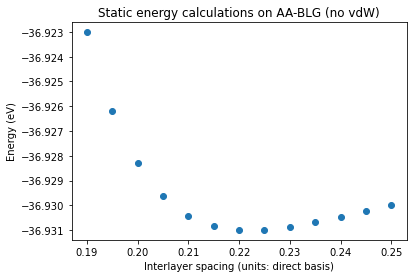

In [48]:
# Plot it out with the points.

spacings = np.linspace(0.15, 0.25, len(lines))
# This is the interlayer spacing parameter (in terms of direct basis)
energies = lines

# Trim off the extreme edges
x = spacings[8:]
y = energies[8:]

plt.scatter(x, y)
plt.title("Static energy calculations on AA-BLG (no vdW)")
plt.xlabel("Interlayer spacing (units: direct basis)")
plt.ylabel("Energy (eV)")
plt.savefig('gr_no_relax_no_vdW_energies.png')

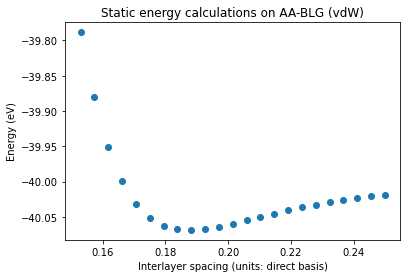

In [49]:
# Same deal but for vdW
spacings_vdW = np.linspace(0.10, 0.25, len(lines_vdW))
energies_vdW = lines_vdW

x_vdW = spacings_vdW[12:]
y_vdW = energies_vdW[12:]
plt.scatter(x_vdW, y_vdW)
plt.title("Static energy calculations on AA-BLG (vdW)")
plt.xlabel("Interlayer spacing (units: direct basis)")
plt.ylabel("Energy (eV)")
plt.savefig('gr_no_relax_vdW_energies.png')

In [36]:
# Get the exact value of the minimum and get the exact number
print("Minimum energy (eV):", min(energies))
minEnSpacingDir = spacings[energies.index(min(energies))]
print("Spacing for minimum (direct units):", minEnSpacingDir)

# Conversion from direct to absolute units is multiplication by 20 since basis vector is 20 \hat{z}

minEnSpacingAbs = 20 * minEnSpacingDir
print("Spacing for minimum (abs units):", minEnSpacingAbs)

Minimum energy (eV): -36.930988
Spacing for minimum (direct units): 0.22
Spacing for minimum (abs units): 4.4


From papers we know that the actual minimum for non-vdW is 4.4 A, so this is good! See [this paper] (https://sites.psu.edu/dftap/2019/03/29/investigation-of-interlayer-distance-for-aa-and-ab-stacked-bilayer-graphene/).

In [37]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

In [38]:
run = Vasprun("vasprun.xml")

Fermi energy: -1.2201822


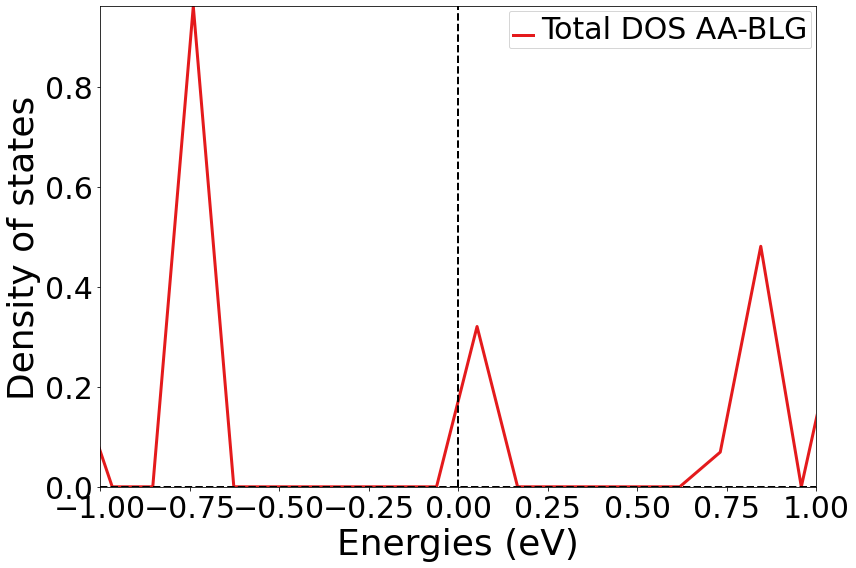

In [39]:
dos = run.tdos
print("Fermi energy:", run.efermi)

dosplot = DosPlotter()
dosplot.add_dos("Total DOS AA-BLG", dos)
dosplot.show([-1, 1])
# dosplot.save_plot("dos")